# **Traing Data**

Auther: Tassawar Abbas\
Email: abbas829@gmail.com\
Kaggle: https://www.kaggle.com/abbas829\
gitub: https://www.github.com/abbas829

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

### **TRAINING DATA PRE-PROCESSING**
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.   

As such, data pre-processing addresses:
- Assumptions about data shape
- Incorrect data types
- Outliers or errors
- Missing values
- Categorical variables


| Technique                        | Description                                                                                                      |
|---------------------------------|------------------------------------------------------------------------------------------------------------------|
| Handling Missing Values         | Strategies for dealing with missing data, including imputation, deletion, and interpolation.                    |
| Data Cleaning                   | Removing or correcting errors, inconsistencies, or outliers in the dataset.                                       |
| Feature Scaling                 | Scaling numerical features to a similar range to prevent features with large values from dominating the model.   |
| Feature Normalization           | Transforming numerical features to have a mean of 0 and a standard deviation of 1.                                |
| One-Hot Encoding                | Encoding categorical variables as binary vectors to represent different categories.                                |
| Label Encoding                  | Converting categorical variables into numerical labels to feed into machine learning algorithms.                 |
| Binning                         | Grouping numerical data into bins or intervals to reduce complexity and noise in the data.                         |
| Feature Engineering             | Creating new features or transforming existing features to improve model performance.                              |
| Data Imputation                 | Filling in missing values in the dataset using statistical methods or machine learning algorithms.                |
| Outlier Detection               | Identifying and handling outliers that deviate significantly from the rest of the data.                             |
| Data Standardization            | Standardizing numerical features to have a mean of 0 and a standard deviation of 1.                                |
| Dimensionality Reduction        | Reducing the number of features in the dataset while preserving important information.                               |
| Text Preprocessing              | Cleaning and preprocessing text data for natural language processing tasks, including tokenization and stemming.  |
| Scaling to Min-Max              | Scaling numerical features to a fixed range, usually between 0 and 1.                                               |
| Log Transformation              | Transforming skewed data distributions to be more symmetrical using logarithmic functions.                          |
| Polynomial Features             | Generating polynomial features by expanding the feature space to capture non-linear relationships.                 |
| Data Normalization              | Scaling numerical features to a normalized range, typically between -1 and 1.                                       |
| Handling Categorical Variables | Converting categorical variables into numerical representations suitable for machine learning algorithms.          |
| Data Discretization             | Converting continuous data into discrete intervals to simplify modeling and interpretation.                         |



In [2]:
full_data = pd.read_csv('./data/titanic_dataset.csv')

**Data Shape**  
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.  

In [3]:
# Data shape
print('train data:',full_data.shape)

train data: (891, 12)


In [4]:
# View first few rows
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing Data**  
From the entry totals above, there appears to be missing data.  A heatmap will help better visualize what features as missing the most information.

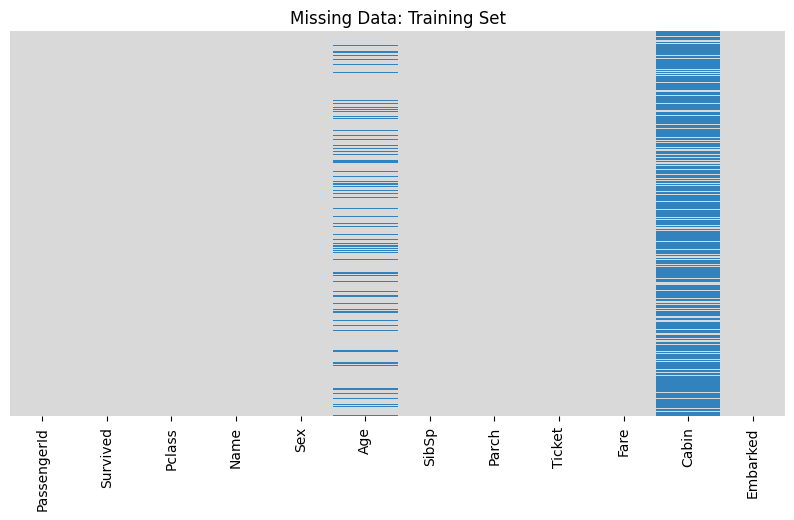

In [6]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

The 'Age' variable is missing roughly 20% of its data. This proportion is likely small enough for reasonable replacements using some form of imputation as well (using the knowledge of the other columns to fill in reasonable values).
However, too much data from the 'Cabin' column is missing to do anything useful with it at a basic level. This column may need to be dropped from the data set altogether or change to another feature such as 'Cabin Known: 1 or 0'.  

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However, we can be smarter about this and check the average age by passenger class.


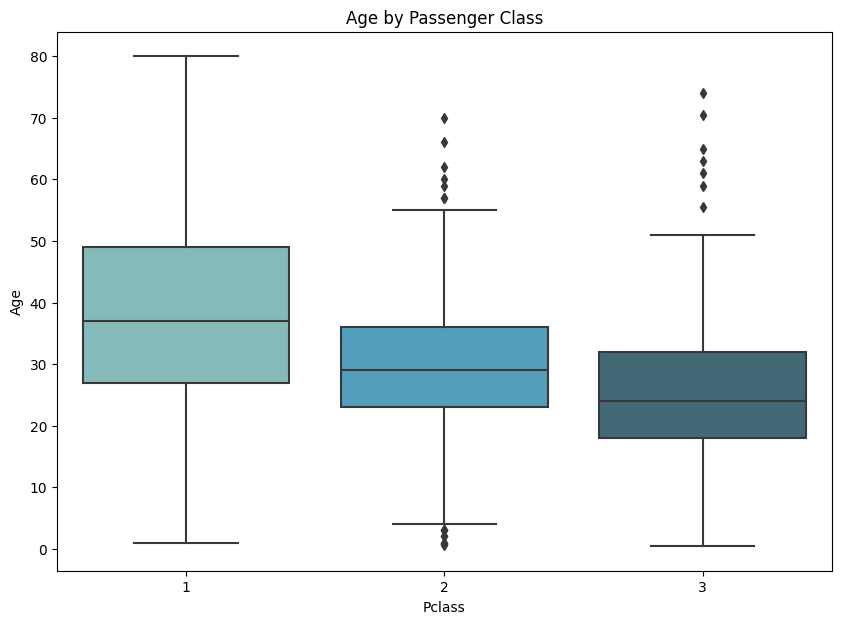

In [7]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = full_data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

Naturally, the wealthier passengers in the higher classes tend to be older . We'll use these average age values to impute based on Pclass for Age.


In [8]:
# Imputation function
def impute_age(cols): 
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
full_data['Age']=full_data[['Age','Pclass']].apply(impute_age, axis =1 )


The Cabin column has too many missing values to do anything useful with, so it would be best to remove it from the data frame altogether.

In [9]:
# Remove Cabin feature
full_data.drop('Cabin', axis = 1, inplace = True)

Since there is only one missing value in Embarked, that observation can just be removed.

In [10]:
# Remove rows with missing data
full_data.dropna(inplace = True)

Name and Ticket can be removed from the dataset as these features do not provide additional information about a passenger's liklihood of survival.    

The remaining non-null objects, Sex and Embarked, will need to be specified as categories for better analysis results downstream.  

In [11]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
# Remove unnecessary columns
full_data.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    full_data[colname] = full_data[colname].astype('category')

In [13]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


**Numeric Features**

In [14]:
# Numeric summary
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId can be removed from the dataset because it does not add any useful information in predicting a passenger's survival.  The remaining variables are the correct data type.

In [15]:
# Remove PassengerId
full_data.drop('PassengerId', inplace = True, axis = 1)

### **GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [16]:
# Shape of train data
full_data.shape

(889, 8)

In [17]:
# Identify categorical features
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [18]:
# Convert categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(full_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(full_data['Embarked'], drop_first = True)

In [19]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
# Add new dummy columns to data frame
full_data = pd.concat([full_data, sex, embarked], axis = 1)
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [21]:
# Drop unecessary columns
full_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',full_data.shape)

# Confirm changes
full_data.head()

train_data shape (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True



>Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric
- everything is concatenated together

## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**


| Step                            | Description                                                                                     |
|---------------------------------|-------------------------------------------------------------------------------------------------|
| 1. Data Collection and Cleaning | Gather and preprocess the dataset, handling missing values, outliers, and formatting issues.   |
| 2. Feature Selection/Extraction | Select relevant features or extract meaningful features from the dataset for model training.    |
| 3. Splitting the Dataset       | Split the dataset into training, validation, and test sets to evaluate model performance.       |
| 4. Choosing a Model            | Select an appropriate machine learning algorithm based on the problem type and dataset.         |
| 5. Model Initialization        | Initialize the chosen model with default hyperparameters or specify custom hyperparameters.     |
| 6. Model Training              | Train the model on the training data using the fit() method, optimizing it for the task at hand. |
| 7. Model Evaluation            | Evaluate the trained model's performance on the validation set using appropriate metrics.       |
| 8. Hyperparameter Tuning       | Fine-tune the model's hyperparameters to improve performance using techniques like grid search.  |
| 9. Model Validation            | Validate the final model on the test set to assess its generalization performance.               |
| 10. Model Deployment           | Deploy the trained model into production or integrate it into the desired application.          |



## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [22]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = full_data['Survived'] # y is the column we're trying to predict


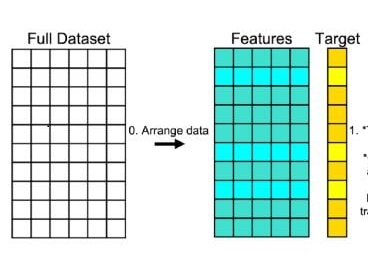

In [23]:
x # x Represents the Features
x.shape

(889, 8)

In [24]:
y # y represents the Target
y.shape

(889,)

In [25]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

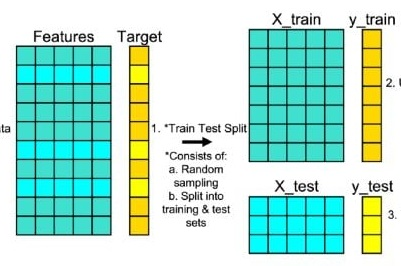

In [26]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
307,1,17.0,1,0,108.9000,False,False,False
229,3,24.0,3,1,25.4667,False,False,True
82,3,24.0,0,0,7.7875,False,True,False
353,3,25.0,1,0,17.8000,True,False,True
707,1,42.0,0,0,26.2875,True,False,True
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,False,False,True
840,3,20.0,0,0,7.9250,True,False,True
338,3,45.0,0,0,8.0500,True,False,True
524,3,24.0,0,0,7.2292,True,False,False


In [27]:
# y_train.shape
y_train

307    1
229    0
82     1
353    0
707    1
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 711, dtype: int64

In [28]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.0500,True,False,True
613,3,24.0,0,0,7.7500,True,True,False
615,2,24.0,1,2,65.0000,False,False,True
337,1,41.0,0,0,134.5000,False,False,False
718,3,24.0,0,0,15.5000,True,True,False
...,...,...,...,...,...,...,...,...
155,1,51.0,0,1,61.3792,True,False,False
450,2,36.0,1,2,27.7500,True,False,True
756,3,28.0,0,0,7.7958,True,False,True
187,1,45.0,0,0,26.5500,True,False,True


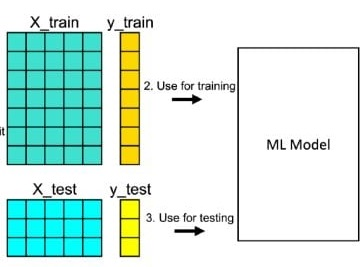

### **LOGISTIC REGRESSION**

## **Model Training**

In [29]:
# Fit
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

## **Model Testing**

## **Class prediction**

In [30]:
# Predict
y_pred_lreg = lreg.predict(x_test)
print(y_pred_lreg)
print(y_pred_lreg.shape)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
(178,)


## **Probabilities of each class**

The predict_proba method returns an array where each row sums to 1, as it contains the probabilities of the sample belonging to each class. For a binary classification problem, the first column corresponds to the probability of the sample being in class 0, and the second column corresponds to the probability of the sample being in class 1.

In [31]:
probabilities = lreg.predict_proba(x_test)[:, 1]
print(probabilities.shape)
print(probabilities)

(178,)
[0.10908141 0.17777421 0.74880807 0.92034313 0.17927961 0.04180315
 0.11547554 0.22991955 0.07867317 0.67574679 0.7884977  0.94485604
 0.10906156 0.57774282 0.1092682  0.12245549 0.9165156  0.8425777
 0.54133102 0.09987258 0.10916028 0.08678763 0.42368082 0.34691515
 0.04217298 0.4390274  0.60013422 0.5895857  0.09283063 0.2990716
 0.09254443 0.25437907 0.01222867 0.10588812 0.1090101  0.11018324
 0.7564167  0.06354467 0.12250014 0.13424276 0.53057329 0.13723505
 0.11896747 0.9279291  0.61232468 0.12680885 0.6160176  0.86610856
 0.10275059 0.26654782 0.48902527 0.79820987 0.16914285 0.12273924
 0.10895276 0.07182449 0.42733119 0.08609823 0.07419069 0.91091416
 0.67574679 0.93454821 0.88923908 0.08638258 0.13953457 0.04964657
 0.11550539 0.43203091 0.05789252 0.14302793 0.33821354 0.13562782
 0.61986137 0.88758908 0.11184504 0.72967974 0.08092747 0.13562782
 0.10357416 0.29689552 0.29920593 0.37616943 0.45073028 0.12245549
 0.28122072 0.65867453 0.07117222 0.87057239 0.09871718 0

## **Probabilities along with the class**

In [32]:
for i in range(len(y_test)):
  print(round(probabilities[i], 3)," --> ", y_pred_lreg[i])

0.109  -->  0
0.178  -->  0
0.749  -->  1
0.92  -->  1
0.179  -->  0
0.042  -->  0
0.115  -->  0
0.23  -->  0
0.079  -->  0
0.676  -->  1
0.788  -->  1
0.945  -->  1
0.109  -->  0
0.578  -->  1
0.109  -->  0
0.122  -->  0
0.917  -->  1
0.843  -->  1
0.541  -->  1
0.1  -->  0
0.109  -->  0
0.087  -->  0
0.424  -->  0
0.347  -->  0
0.042  -->  0
0.439  -->  0
0.6  -->  1
0.59  -->  1
0.093  -->  0
0.299  -->  0
0.093  -->  0
0.254  -->  0
0.012  -->  0
0.106  -->  0
0.109  -->  0
0.11  -->  0
0.756  -->  1
0.064  -->  0
0.123  -->  0
0.134  -->  0
0.531  -->  1
0.137  -->  0
0.119  -->  0
0.928  -->  1
0.612  -->  1
0.127  -->  0
0.616  -->  1
0.866  -->  1
0.103  -->  0
0.267  -->  0
0.489  -->  0
0.798  -->  1
0.169  -->  0
0.123  -->  0
0.109  -->  0
0.072  -->  0
0.427  -->  0
0.086  -->  0
0.074  -->  0
0.911  -->  1
0.676  -->  1
0.935  -->  1
0.889  -->  1
0.086  -->  0
0.14  -->  0
0.05  -->  0
0.116  -->  0
0.432  -->  0
0.058  -->  0
0.143  -->  0
0.338  -->  0
0.136  -->  0
0.

## **Model Evaluation**

In [33]:
# Score It
from sklearn.metrics import classification_report, accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Classification Model
------------------------------------------------------------
Accuracy 82.02 %


### **Interpretation**  
**Accuracy**  
82% of the model's predictions are correct.